## Franka Slide 

Check the RGB and Depth images of franka slide dataset. 

In [1]:
import h5py

frankaslide_dataset = h5py.File('data/frankaslide_tactile.hdf5', 'r')

(224, 224)
0 2177


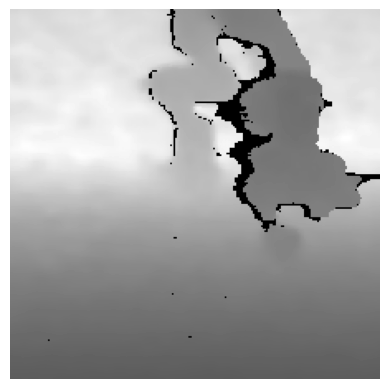

In [2]:
import numpy as np

sample = frankaslide_dataset["demo_2"]["obs"]["agentview"]["depth"][100]
print(sample.shape)
print(np.min(sample), np.max(sample))

import matplotlib.pyplot as plt

plt.imshow(sample.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

In [8]:
frankaslide_dataset["demo_48"]["obs"].keys()

<KeysViewHDF5 ['agentview', 'delta_time', 'ee_pos', 'ee_quat', 'gripper_state', 'gripper_width', 'joint_pos', 'joint_vel', 'tactile']>

(224, 224, 3)
0 255


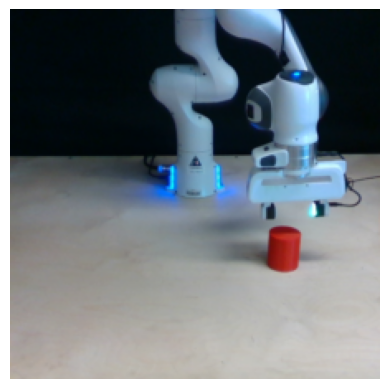

In [3]:
sample = frankaslide_dataset["demo_2"]["obs"]["agentview"]["color"][100]
print(sample.shape)
# sample = sample[..., ::-1] # BGR to RGB
print(np.min(sample), np.max(sample))

plt.imshow(sample)
plt.axis('off')
plt.show()

In [33]:
# Collect all actions from the dataset and compute their norms
actions = []
for demo in frankaslide_dataset.keys():
    demo_actions = frankaslide_dataset[demo]["actions"][:][:, :3]
    actions.append(demo_actions)
actions = np.concatenate(actions, axis=0)

# Compute the norm of each action vector
actions_norm = np.linalg.norm(actions, axis=1)
print("Average norm:", actions_norm.mean(), "\nMax norm:", actions_norm.max(), "\nMin norm:", actions_norm.min(), "\nMedian norm:", np.median(actions_norm))

Average norm: 0.005034585830266681 
Max norm: 0.013273419810636133 
Min norm: 0.0 
Median norm: 0.005617029500382143


## Robomimic image

Plot the robomimic Can image for comparison. 

(84, 84, 3)
2 251


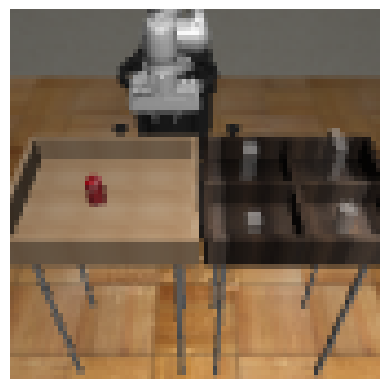

In [26]:
robomimic_dataset = h5py.File('libs/CleanDiffuser/datasets/can/ph/image.hdf5', 'r')
sample = robomimic_dataset["data"]["demo_10"]["obs"]["agentview_image"][0]
print(sample.shape)
print(np.min(sample), np.max(sample))

import matplotlib.pyplot as plt

plt.imshow(sample)
plt.axis('off')
plt.show()